# Selecting the right threshold using ROC curve

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_classification # since we dont have any datastes we are using this make_classification
from sklearn.model_selection import train_test_split

In [3]:
X,y= make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1) #since we are not defining features,
#by default it will be 20.
##output class =2
##weights =1,1 means the dataset will have equal no. of both the classes.

In [4]:
X.shape

(2000, 20)

In [5]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [7]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9880937313964553
Logistic test roc-auc: 0.9834483448344834


In [9]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

In [10]:
ytrain_pred

array([[9.02834498e-01, 9.71655023e-02],
       [9.98989089e-01, 1.01091060e-03],
       [9.98722469e-01, 1.27753065e-03],
       ...,
       [8.18730880e-02, 9.18126912e-01],
       [9.99908429e-01, 9.15707176e-05],
       [9.93274918e-01, 6.72508158e-03]])

## Adaboost Classifier

In [13]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train,y_train)
y_train_pred=ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9880937313964553
Adaboost test roc-auc: 0.9773977397739775


## KNNClassifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981632002550004
Adaboost test roc-auc: 0.9362436243624362


## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.983023302330233


### No we will focus on selecting the best threshold for maximum accuracy

In [17]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction= pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9823232323232323


In [18]:
pred

[0      0.01
 1      0.05
 2      1.00
 3      0.99
 4      0.01
        ... 
 395    0.00
 396    0.83
 397    0.00
 398    0.02
 399    0.88
 Length: 400, dtype: float64,
 0      0.024001
 1      0.018002
 2      0.994327
 3      0.969379
 4      0.001530
          ...   
 395    0.000915
 396    0.812491
 397    0.000194
 398    0.036156
 399    0.995978
 Length: 400, dtype: float64,
 0      0.441006
 1      0.465873
 2      0.691711
 3      0.682802
 4      0.444995
          ...   
 395    0.419166
 396    0.518328
 397    0.431786
 398    0.445731
 399    0.699039
 Length: 400, dtype: float64,
 0      0.4
 1      0.0
 2      1.0
 3      1.0
 4      0.2
       ... 
 395    0.2
 396    0.6
 397    0.2
 398    0.2
 399    1.0
 Length: 400, dtype: float64]

In [19]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.01,0.024001,0.441006,0.4
1,0.05,0.018002,0.465873,0.0
2,1.00,0.994327,0.691711,1.0
3,0.99,0.969379,0.682802,1.0
4,0.01,0.001530,0.444995,0.2
...,...,...,...,...
395,0.00,0.000915,0.419166,0.2
396,0.83,0.812491,0.518328,0.6
397,0.00,0.000194,0.431786,0.2
398,0.02,0.036156,0.445731,0.2


In [20]:
final_prediction

0      0.218752
1      0.133469
2      0.921510
3      0.910545
4      0.164131
         ...   
395    0.155020
396    0.690205
397    0.157995
398    0.175472
399    0.893754
Length: 400, dtype: float64

In [21]:
fpr,tpr,thresholds=roc_curve(y_test,final_prediction)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_ls=[]
for thres in thresholds:
    y_pred=np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()


,thresholds,accuracy
11,0.583556,0.9625
13,0.514892,0.9625
12,0.563018,0.9625
10,0.601928,0.9600
9,0.626672,0.9600


In [23]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

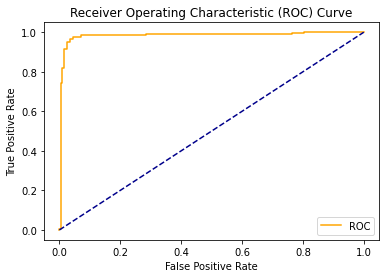

In [24]:

plot_roc_curve(fpr,tpr)